In [1]:
#neural network model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv('../generated_cpu_data_with_anomaly.csv')
df['date'] = pd.to_datetime(df['date'])

In [3]:
df

,cpu_util,date,anomaly
0,89.447320,2023-06-25 00:03:05.640,1
1,57.320538,2023-06-25 00:08:05.640,0
2,87.058688,2023-06-25 00:13:05.640,1
3,87.409467,2023-06-25 00:18:05.640,1
4,78.111494,2023-06-25 00:23:05.640,1
...,...,...,...
8635,2.692620,2023-07-24 23:38:06.441,0
8636,30.604348,2023-07-24 23:43:06.441,1
8637,14.278655,2023-07-24 23:48:06.441,0
8638,35.247145,2023-07-24 23:53:06.441,1


In [4]:
num_lags = 5

#add lag
for i in range(1, num_lags+1):
    df['lag_{}'.format(i)] = df['cpu_util'].shift(i)
  
df = df.dropna()

In [5]:
df

,cpu_util,date,anomaly,lag_1,lag_2,lag_3,lag_4,lag_5
5,65.111306,2023-06-25 00:28:05.640,0,78.111494,87.409467,87.058688,57.320538,89.447320
6,94.526610,2023-06-25 00:33:05.640,1,65.111306,78.111494,87.409467,87.058688,57.320538
7,82.007848,2023-06-25 00:38:05.640,1,94.526610,65.111306,78.111494,87.409467,87.058688
8,79.773427,2023-06-25 00:43:05.640,1,82.007848,94.526610,65.111306,78.111494,87.409467
9,74.058017,2023-06-25 00:48:05.640,1,79.773427,82.007848,94.526610,65.111306,78.111494
...,...,...,...,...,...,...,...,...
8635,2.692620,2023-07-24 23:38:06.441,0,16.306464,30.297529,8.752093,6.537829,28.162398
8636,30.604348,2023-07-24 23:43:06.441,1,2.692620,16.306464,30.297529,8.752093,6.537829
8637,14.278655,2023-07-24 23:48:06.441,0,30.604348,2.692620,16.306464,30.297529,8.752093
8638,35.247145,2023-07-24 23:53:06.441,1,14.278655,30.604348,2.692620,16.306464,30.297529


In [8]:
X = df[['cpu_util', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']]
y = df['anomaly']

In [9]:
X['cpu_util'] = (X['cpu_util']/100).astype(float)
X['lag_1'] = (X['lag_1']/100).astype(float)
X['lag_2'] = (X['lag_2']/100).astype(float)
X['lag_3'] = (X['lag_3']/100).astype(float)
X['lag_4'] = (X['lag_4']/100).astype(float)
X['lag_5'] = (X['lag_5']/100).astype(float)

C:\Users\HP\AppData\Local\Temp\ipykernel_5588\2458381296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cpu_util'] = (X['cpu_util']/100).astype(float)
C:\Users\HP\AppData\Local\Temp\ipykernel_5588\2458381296.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['lag_1'] = (X['lag_1']/100).astype(float)
C:\Users\HP\AppData\Local\Temp\ipykernel_5588\2458381296.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [10]:
X_train = X[:int(0.7*len(X))]
X_test = X[int(0.7*len(X)):]
y_train = y[:int(0.7*len(y))]
y_test = y[int(0.7*len(y)):]

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

C:\Users\HP\AppData\Local\Temp\ipykernel_5588\3789776307.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train = y[:int(0.7*len(y))]
C:\Users\HP\AppData\Local\Temp\ipykernel_5588\3789776307.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test = y[int(0.7*len(y)):]


In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(6, 1), return_sequences=True),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [16]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20


189/189 [==============================] - 8s 18ms/step - loss: 0.2990 - accuracy: 0.9308 - val_loss: 0.2081 - val_accuracy: 0.9475
Epoch 2/20
189/189 [==============================] - 2s 10ms/step - loss: 0.2453 - accuracy: 0.9308 - val_loss: 0.1988 - val_accuracy: 0.9475
Epoch 3/20
189/189 [==============================] - 2s 9ms/step - loss: 0.2418 - accuracy: 0.9308 - val_loss: 0.1948 - val_accuracy: 0.9475
Epoch 4/20
189/189 [==============================] - 2s 9ms/step - loss: 0.2361 - accuracy: 0.9308 - val_loss: 0.1899 - val_accuracy: 0.9475
Epoch 5/20
189/189 [==============================] - 2s 9ms/step - loss: 0.2328 - accuracy: 0.9308 - val_loss: 0.1876 - val_accuracy: 0.9475
Epoch 6/20
189/189 [==============================] - 2s 9ms/step - loss: 0.2277 - accuracy: 0.9308 - val_loss: 0.1787 - val_accuracy: 0.9475
Epoch 7/20
189/189 [==============================] - 2s 8ms/step - loss: 0.2228 - accuracy: 0.9308 - val_loss: 0.1695 - val_accuracy: 0.9475
Ep

In [23]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [24]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
model2.fit(X_train, y_train, epochs=20,  validation_data=(X_test, y_test))

Epoch 1/20
189/189 [==============================] - 1s 3ms/step - loss: 0.3643 - accuracy: 0.8896 - val_loss: 0.2241 - val_accuracy: 0.9475
Epoch 2/20
189/189 [==============================] - 0s 2ms/step - loss: 0.2266 - accuracy: 0.9308 - val_loss: 0.1673 - val_accuracy: 0.9475
Epoch 3/20
189/189 [==============================] - 0s 3ms/step - loss: 0.1967 - accuracy: 0.9333 - val_loss: 0.1525 - val_accuracy: 0.9502
Epoch 4/20
189/189 [==============================] - 1s 3ms/step - loss: 0.1837 - accuracy: 0.9371 - val_loss: 0.1343 - val_accuracy: 0.9494
Epoch 5/20
189/189 [==============================] - 0s 2ms/step - loss: 0.1727 - accuracy: 0.9375 - val_loss: 0.1330 - val_accuracy: 0.9487
Epoch 6/20
189/189 [==============================] - 0s 2ms/step - loss: 0.1674 - accuracy: 0.9378 - val_loss: 0.1263 - val_accuracy: 0.9506
Epoch 7/20
189/189 [==============================] - 0s 2ms/step - loss: 0.1677 - accuracy: 0.9380 - val_loss: 0.1185 - val_accuracy: 0.9498
Epoch 

In [31]:
model.predict([[0.623, 0.2, 0.2, 0.4, 0.4, 0.3]])

1/1 [==============================] - 0s 48ms/step


array([[0.5076948]], dtype=float32)

In [32]:
#get the test data
df_test = pd.read_csv('../generated_cpu_data_test_2.csv')

In [33]:
df_test['date'] = pd.to_datetime(df_test['date'])

In [34]:
num_lags = 5

#add lag
for i in range(1, num_lags+1):
    df_test['lag_{}'.format(i)] = df_test['cpu_util'].shift(i)
  
df_test = df_test.dropna()

In [35]:
df_test

,cpu_util,date,lag_1,lag_2,lag_3,lag_4,lag_5
5,62.700953,2023-07-25 00:28:06.466,82.504274,73.259342,100.895190,82.067813,66.834766
6,88.266038,2023-07-25 00:33:06.466,62.700953,82.504274,73.259342,100.895190,82.067813
7,99.878291,2023-07-25 00:38:06.466,88.266038,62.700953,82.504274,73.259342,100.895190
8,93.067682,2023-07-25 00:43:06.466,99.878291,88.266038,62.700953,82.504274,73.259342
9,91.738968,2023-07-25 00:48:06.466,93.067682,99.878291,88.266038,62.700953,82.504274
...,...,...,...,...,...,...,...
10363,28.858958,2023-08-29 23:38:07.394,31.093691,53.711871,51.511873,51.289321,56.025410
10364,23.238560,2023-08-29 23:43:07.394,28.858958,31.093691,53.711871,51.511873,51.289321
10365,53.869919,2023-08-29 23:48:07.394,23.238560,28.858958,31.093691,53.711871,51.511873
10366,30.824553,2023-08-29 23:53:07.394,53.869919,23.238560,28.858958,31.093691,53.711871


In [36]:
X_test = df_test[['cpu_util', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']]

X_test['cpu_util'] = (X_test['cpu_util']/100).astype(float)
X_test['lag_1'] = (X_test['lag_1']/100).astype(float)
X_test['lag_2'] = (X_test['lag_2']/100).astype(float)
X_test['lag_3'] = (X_test['lag_3']/100).astype(float)
X_test['lag_4'] = (X_test['lag_4']/100).astype(float)
X_test['lag_5'] = (X_test['lag_5']/100).astype(float)

C:\Users\HP\AppData\Local\Temp\ipykernel_5588\528599200.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['cpu_util'] = (X_test['cpu_util']/100).astype(float)
C:\Users\HP\AppData\Local\Temp\ipykernel_5588\528599200.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['lag_1'] = (X_test['lag_1']/100).astype(float)
C:\Users\HP\AppData\Local\Temp\ipykernel_5588\528599200.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [37]:
predict = model.predict(X_test)

324/324 [==============================] - 2s 3ms/step


In [38]:
predict

array([[0.00470713],
       [0.12019662],
       [0.24306017],
       ...,
       [0.33580118],
       [0.01671251],
       [0.02412625]], dtype=float32)

In [39]:
predict.max()

0.5934744

In [40]:
#add the prediction to the test data
df_test['predict'] = predict


In [41]:
df_test['predict'] = df_test['predict'].apply(lambda x: 1 if x > 0.5 else 0)

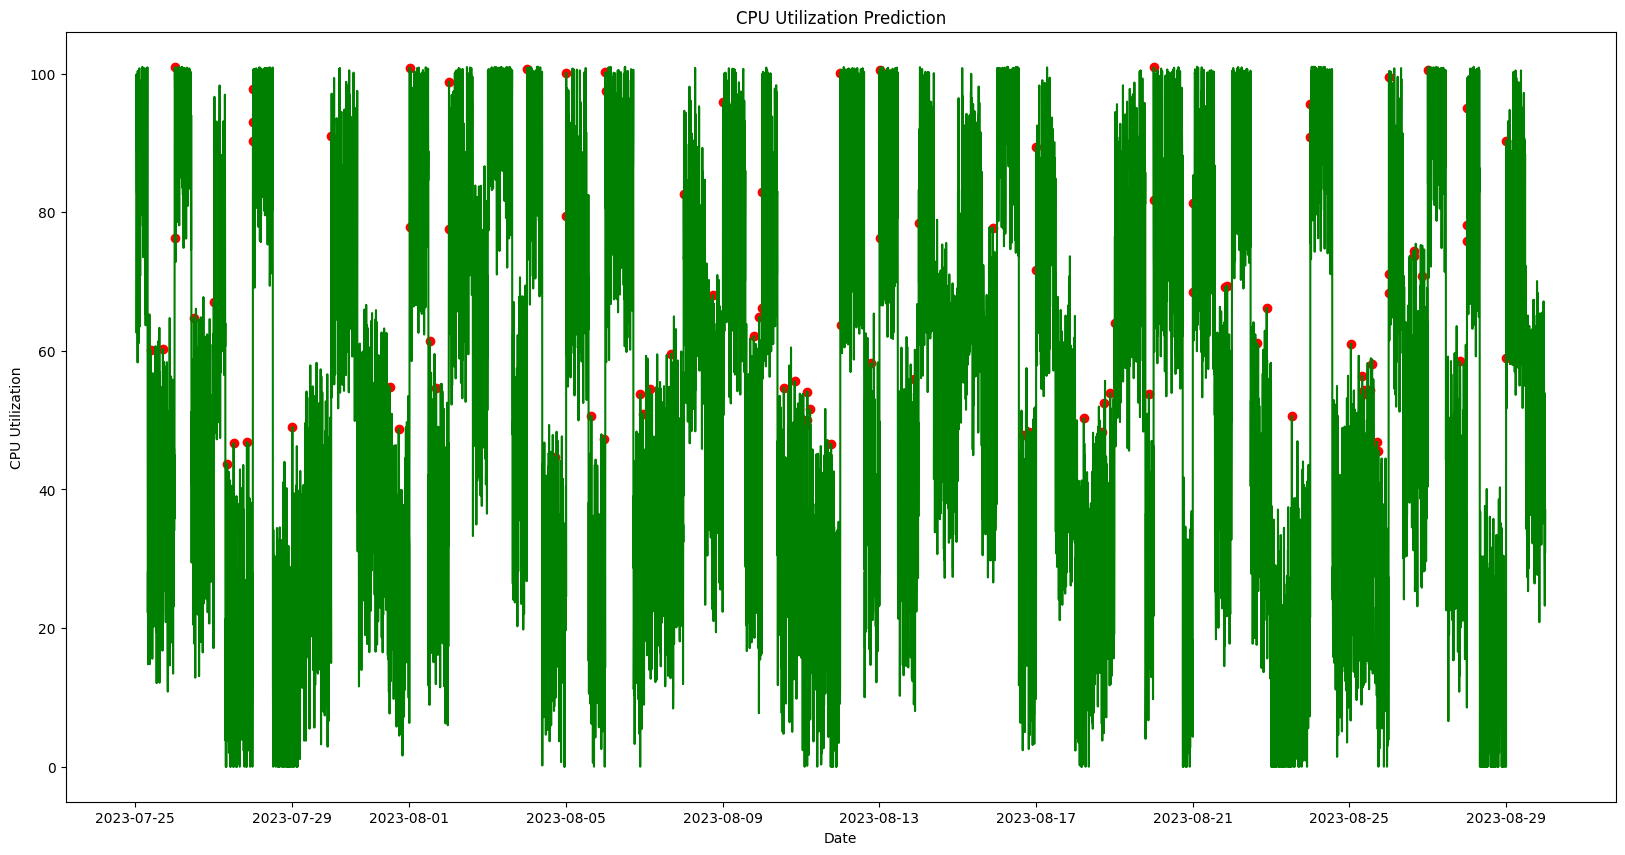

In [42]:
#scatter plot the prediction 1
anomaly = df_test.iloc[np.where(df_test['predict'] == 1)]

plt.figure(figsize=(20,10))
plt.plot(df_test['date'], df_test['cpu_util'], color='green')
plt.scatter(anomaly['date'], anomaly['cpu_util'], color='red')
plt.xlabel('Date')
plt.ylabel('CPU Utilization')
plt.title('CPU Utilization Prediction')
plt.show()



In [43]:
model.predict([[1, 0.8, 0.9, 0.7, 0.8, 0.9]])

1/1 [==============================] - 0s 54ms/step


array([[0.21961114]], dtype=float32)

In [44]:
model.save('model_with_5gap.h5')

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
